# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

**Описание проекта**

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель**

Исследование факторов влияющих на стоимость квартиры, таких как площадь, число комнат, удалённости от центра, этаж и другие.

**Ход исследования**

Данные с информацией о квартире хранятся в файле `real_estate_data.csv`. 
Известно, что в данных есть пропущенные значения, могут встречаться артефакты (аномалии) и дубликаты.
Поэтому перед выявлением интересующих зависимостей понадобится обзор и предобработка данных. 
Также для исследования понадобятся параметры расчитанные на основе имеющихся данных.

Таким образом, исследование будет включать следующие этапы:
 1. Обзор данных.
 2. Предобработка данных
 3. Расчёты и добавление результатов в таблицу
 4. Исследовательский анализ данных


## Изучение данных из файла

In [183]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
try:
    real_estate_data = pd.read_csv('data_files/real_estate_data.csv',sep='\t')  # Локальный путь
except:
    real_estate_data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')  # Серверный путь


real_estate_data.info()
#real_estate_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Согласно документации к данным в таблице есть следующие столбцы (приведены в алфовитном порядке):

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)


### Вывод

В таблице представлены данные по продаже квартир за несколько лет.
В каждой строке таблици данные по одной квартире. Большая часть колонок описывает саму квартиру: площадь, число комнат, на каком этаже находится, является ли студией или аппартаментами, имеется ли балкон, высота потолков и другие. Также есть колонки, которые описывают расположение квартиры: близость до центра, аэропорта, парков и водоемов и наличие парков и водоемов в окрестности трех километров. И есть информация по объявлению: когда выставлено и сколько дней прошло до момента продажи.

Интересно, что нет данных является ли санузел совмещенным или раздельным, данный параметр может влиять на цену квартиры, так как раздельный санузел предпочтительней.

Предварительно можно утверждать, что, данных достаточно для установления зависимостей. 
Однако, в данных видны следующие проблемы: пропущеные значения (в 14 из 22 колонках), неправильное определение типа данных.

## Предобработка данных

In [185]:
# подсчет пропусков в колонках
real_estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Колонка с числом балконов `balcony`.**

Пропуски в этой колнке скорее всего говорят об отсутствии балконов в квартире. Поэтому заменим пропуски на 0.

В колонке также был неверно определен тип данных изменим его с float на int

In [186]:
real_estate_data['balcony'] = real_estate_data['balcony'].fillna(0)
real_estate_data['balcony'] = real_estate_data['balcony'].astype(int)

In [187]:
# проверка на аномалии
real_estate_data['balcony'].sort_values().unique()

array([0, 1, 2, 3, 4, 5])

**Колонка апартаменты `is_apartment`.**

Пропуски в этой колонке скорее всего обозначают, что квартира не является апартаментами, поэтому пропуски заменены на False. 

Аномалий в столбце не обнаружено.

In [188]:
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].fillna(False)

**Колонка апартаменты `locality_name`.**

Для исключения неявных дубикатов удалим тип поселения из названия (деревня/село/поселок и другие)

In [189]:
# приведем посёлок и поселок к единому написанию
real_estate_data['locality_name'] = real_estate_data['locality_name'].str.replace('посёлок','поселок')

# типы поселений, которые надо удалить из названия
vilage_type = ['городской поселок ',
               'деревня ',
               'поселок городского типа ',
               'поселок при железнодорожной станции ',
               'поселок станции ',
               'село ',
               'садовое товарищество ',
               'садоводческое некоммерческое товарищество ',
               'коттеджный поселок ',
               'поселок ']

# функция для удаления типа поселения
def vilage_type_delete(delete_list,delete_column):
    for name in delete_list:
        delete_column = delete_column.str.replace(name,'')
    return delete_column

real_estate_data['locality_name'] = vilage_type_delete(vilage_type,real_estate_data['locality_name'])     
#real_estate_data['locality_name'].sort_values().unique()

**Колонка с высотой потолков `ceiling_height`.**

В колонке встречаются как пропуски, так и аномалии.
В случае пропусков здесь нет логичного значения для заполнения, поэтому оставим пропуски как есть.

Рассмотрим аномалии. Выведем уникальные значения столбца.

In [190]:
real_estate_data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Высота потолков ниже 2.4 и выше 6 метров кажется не логичной.
При этом высота 24., 25., 26., 27., 27.5, 32. это явные ошибки записи и соответсвуют высотам  2.4, 2.5, 2.6, 2.7, 2.75, 3.2 метров, которые можно исправить.
С другими ошибками нет очевидной замены.


In [191]:
real_estate_data.loc[(real_estate_data['ceiling_height'] >= 24), 'ceiling_height'] = real_estate_data['ceiling_height']/10
real_estate_data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.3 ,  2.34,  2.4 ,
        2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,
        2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,
        2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,
        2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,
        2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,
        2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.98,
        2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,
        3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,
        3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,
        3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,
        3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,
        3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,
        3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,
        3.66,  3.67,


Здесь неплохим критерием для проверки является ли значение аномалией или просто нестандартной высотой, будет частотность высоты. Рассмотрим высоту потолков, которая встречается менее 3 раз.

In [192]:
#real_estate_data[(real_estate_data['ceiling_height'] < 2.6) | (real_estate_data['ceiling_height'] > 5.0)]['ceiling_height'].sort_values().value_counts()
#ceiling[ceiling <= 1 ].sort_values()

**Колонка с числом парков в радиусе 3 км `parks_around3000` и колонка с расстояние до ближайшего парка `parks_nearest`.**

Проверим колнку `parks_around3000` на явные аномалии:

In [193]:
real_estate_data['parks_around3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

Теперь посмотрим как соотносятся 0 и NaN в `parks_around3000` с NaN в`parks_nearest`

In [194]:
print('Уникальные значения parks_around3000 при parks_nearest == NaN:',
      real_estate_data[real_estate_data['parks_nearest'].isna() == True]['parks_around3000'].unique())
print('Количество строк с parks_nearest == NaN:',
      real_estate_data['parks_nearest'].isna().sum())
print('Количество строк с parks_around3000 == NaN:',
      real_estate_data['parks_around3000'].isna().sum())
print('Количество строк с parks_around3000 == 0:',
      real_estate_data[real_estate_data['parks_around3000'] == 0]['parks_around3000'].count())
print('Уникальные значения parks_nearest при parks_around3000==0:',
      real_estate_data[real_estate_data['parks_around3000'] == 0]['parks_nearest'].unique())

Уникальные значения parks_around3000 при parks_nearest == NaN: [ 0. nan]
Количество строк с parks_nearest == NaN: 15620
Количество строк с parks_around3000 == NaN: 5518
Количество строк с parks_around3000 == 0: 10106
Уникальные значения parks_nearest при parks_around3000==0: [  nan 3064. 3190. 3013.]


Получается, что для все `parks_nearest` == NaN соответвуют `parks_around3000` == 0.

Заменим все `parks_around3000` == NaN на `parks_around3000` == 0.

`parks_nearest` == NaN оставляем как есть.

Меняем тип `parks_around3000` на int.

In [195]:
real_estate_data.loc[real_estate_data['parks_around3000'].isna() == True,'parks_around3000'] = 0
real_estate_data['parks_around3000'] = real_estate_data['parks_around3000'].astype(int)

**Колонка с числом парков в радиусе 3 км `ponds_around3000` и колонка с расстояние до ближайшего парка `ponds_nearest`.**

Проделаем тоже самое с `ponds_around3000` и `ponds_nearest`
Проверим колнку `ponds_around3000` на явные аномалии:

In [196]:
real_estate_data['ponds_around3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

Теперь посмотрим как соотносятся 0 и NaN в `ponds_around3000` с NaN в`ponds_nearest`

In [197]:
print('Уникальные значения ponds_around3000 при ponds_nearest == NaN:',
      real_estate_data[real_estate_data['ponds_nearest'].isna() == True]['ponds_around3000'].unique())
print('Количество строк с ponds_nearest == NaN:',
      real_estate_data['ponds_nearest'].isna().sum())
print('Количество строк с ponds_around3000 == NaN:',
      real_estate_data['ponds_around3000'].isna().sum())
print('Количество строк с ponds_around3000 == 0:',
      real_estate_data[real_estate_data['ponds_around3000'] == 0]['ponds_around3000'].count())
print('Уникальные значения ponds_nearest при ponds_around3000==0:',
      real_estate_data[real_estate_data['ponds_around3000'] == 0]['ponds_nearest'].unique())

Уникальные значения ponds_around3000 при ponds_nearest == NaN: [ 0. nan]
Количество строк с ponds_nearest == NaN: 14589
Количество строк с ponds_around3000 == NaN: 5518
Количество строк с ponds_around3000 == 0: 9071
Уникальные значения ponds_nearest при ponds_around3000==0: [nan]


Получается, что для все `ponds_nearest` == NaN соответвуют `ponds_around3000` == 0.

Заменим все `ponds_around3000` == NaN на `ponds_around3000` == 0.

`ponds_nearest` == NaN оставляем как есть.

Меняем тип `ponds_around3000` на int.

In [198]:
real_estate_data.loc[real_estate_data['ponds_around3000'].isna() == True,'ponds_around3000'] = 0
real_estate_data['ponds_around3000'] = real_estate_data['ponds_around3000'].astype(int)

**Колонка с площадью кухни `kitchen_area`.**

Для всех студий площадь кухни обозначена как NaN. Однако, обратное не верно.

In [199]:
real_estate_data.loc[real_estate_data['studio'] == True]['kitchen_area'].unique()

array([nan])

In [200]:
real_estate_data.loc[real_estate_data['kitchen_area'].isna() == True]['studio'].unique()

array([False,  True])

Для всех студий изменим площадь кухни на 0.

In [201]:
real_estate_data.loc[real_estate_data['studio'] == True,'kitchen_area'] = 0

In [202]:
real_estate_data.loc[real_estate_data['studio'] == True]['kitchen_area'].unique()

array([0.])

**Колонка с количеством дней от публикации до снятия `days_exposition`.**

Меняем тип `days_exposition` на int.

In [203]:
#real_estate_data['days_exposition'] = real_estate_data['days_exposition'].astype(int)

**Колонки `floors_total`, `living_area`, `kitchen_area`, `locality_name`, `ceiling_height`, `airports_nearest`, `cityCenters_nearest`, `days_exposition`.**

В колонках встречаются пропуски, но логичного значения для заполнения здесь нет, поэтому оставим пропуски как есть.

Аномалии в столбцах необнаружены.

**Колонка с датаой публикации `first_day_exposition`.**

Приведем колоку к типу DateTime

In [204]:
real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'],
                                                          format='%Y.%m.%dT%H:%M:%S')

**Удаление дубликатов**

In [205]:
print('Количество явных дубликатов в таблице:')
real_estate_data.duplicated().sum()

Количество явных дубликатов в таблице:


0

In [206]:
real_estate_data = real_estate_data.drop_duplicates().reset_index(drop=True)

In [207]:
print('Количество явных дубликатов в таблице:')
real_estate_data.duplicated().sum()

Количество явных дубликатов в таблице:


0

Информация по исправленному датасету:

In [208]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21570 non-null  float64       
 13  balcony         

In [209]:
real_estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2129
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Вывод**

На этапе предобработка обнаружены и частично исправлены следующие проблемы в данных:

- пропущенные значения,
- аномальные значения и ошибки записи.

Часть пропусков - это отсутсвие информации в объявлении, например, количесво балконов и является ли квариртира апартаментами. 
В некоторых случаях, пропуски это скорее информация, к примеру пропуски в столбце `parks_nearest`, говорит о том, что поблизости парков нет.

В данных есть аномалии, например высота потолков 1 или 100 метров - это явные опечатки. Но заменять их чем-то сложно - можно внести ошибку. Поэтому строки с аномалиями лучше отбросить при необходимости. Сейчас это не делалось, так как можно потерять часть данных.

Также были исправлены названия населенных пунктов - приведены к одному написанию, так не будет дубликатов.


## Расчёты и добавление результатов в таблицу

Для дальнейшего анализа необходимо добавить в таблицу:

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [210]:
real_estate_data['price_per_square_meter'] = real_estate_data['last_price']/ real_estate_data['total_area']

In [211]:
real_estate_data['weekday_exposition'] =  pd.DatetimeIndex(real_estate_data['first_day_exposition']).day
real_estate_data['month_exposition'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).month
real_estate_data['year_exposition'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).year

In [212]:
real_estate_data['floor_group'] = real_estate_data['floor']

real_estate_data.loc[real_estate_data['floor'] == 1,'floor_group'] = 'Первый'
real_estate_data.loc[real_estate_data['floor'] == real_estate_data['floors_total'],'floor_group'] = 'Последний'
real_estate_data.loc[real_estate_data['floors_total'].isna() == True,'floor_group'] = 'Неопределен'
real_estate_data['floor_group'] = (
    real_estate_data['floor_group']
    .where(real_estate_data['floor_group'].isin(['Первый','Последний','Неопределен']), 'Другой')    
)


In [213]:
real_estate_data['living_to_total_area'] = real_estate_data['living_area']/ real_estate_data['total_area']

In [214]:
real_estate_data['kitchen_to_total_area'] = real_estate_data['kitchen_area']/ real_estate_data['total_area']

**Вывод**

Посчитано и добавлено в таблицу:
- цена квадратного метра
- день недели, месяц и год публикации объявления
- этаж квартиры; варианты — первый, последний, другой, неопределен
- посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей

## Исследовательский анализ данных

**Общая площадь `total_area`**

Text(0.5, 0, 'Общая площадь квартиры, м^2')

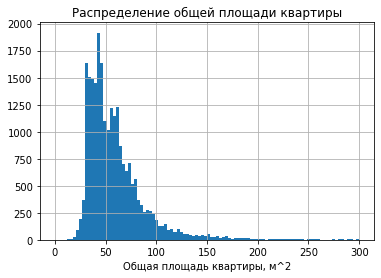

In [215]:
real_estate_data['total_area'].hist(bins=100, range=(0,300))
plt.title('Распределение общей площади квартиры')
plt.xlabel('Общая площадь квартиры, м^2')

In [216]:
real_estate_data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Text(0, 0.5, 'Общая площадь квартиры, м^2')

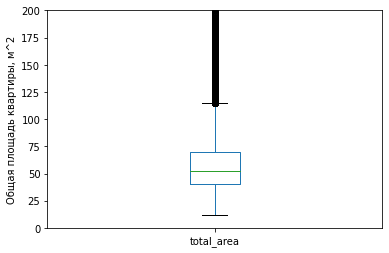

In [217]:
real_estate_data['total_area'].plot(kind='box',ylim=(0,200))
plt.ylabel('Общая площадь квартиры, м^2')

Гистограмма общей площади имеет вид распределения Пуассона.

Медианное значение равно 52 $м^2$. Половина всех значений общей площади укладывается между значениями 40 и 70 $м^2$

**Цена `last_price`**

Text(0.5, 0, 'Цены продажи квартиры, руб')

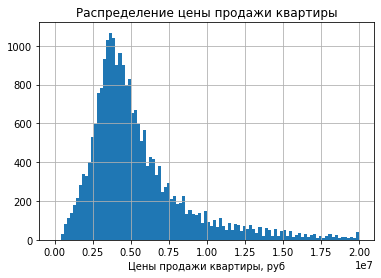

In [218]:
real_estate_data['last_price'].hist(bins=100, range=(0,20_000_000))
plt.title('Распределение цены продажи квартиры')
plt.xlabel('Цены продажи квартиры, руб')

In [219]:
real_estate_data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Text(0, 0.5, 'Цены продажи квартиры, руб')

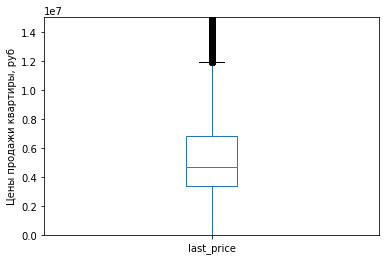

In [220]:
real_estate_data['last_price'].plot(kind='box',ylim=(0,15_000_000))
plt.ylabel('Цены продажи квартиры, руб')

Гистограмма значений цен на квартиру имеет вид распределения Пуассона.

Медианное значение равно 4.65 млн. Половина всех значений укладывается между значениями 3.4 и 6.8 млн.

**Число комнат `rooms`**

Text(0.5, 0, 'Количесво комнат')

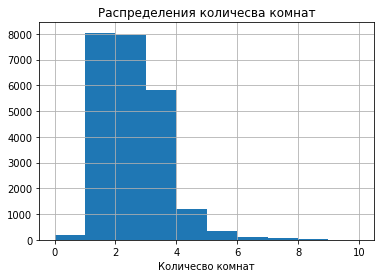

In [221]:
real_estate_data['rooms'].hist(bins=10, range=(0,10))
plt.title('Распределения количесва комнат')
plt.xlabel('Количесво комнат')

In [222]:
real_estate_data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Text(0, 0.5, 'Количесво комнат')

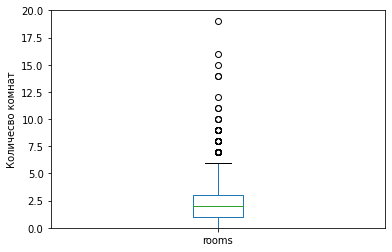

In [223]:
real_estate_data['rooms'].plot(kind='box',ylim=(0,20))
plt.ylabel('Количесво комнат')

Гистограмма для количесвтва комнат имеет вид распределения Пуассона.

Медианное значение равно 2. Квартиры с количесвом комнат выше 6 очень редки и можно считать выбросами.

**Высота потолков `ceiling_height`**

Text(0.5, 0, 'Высота потолков')

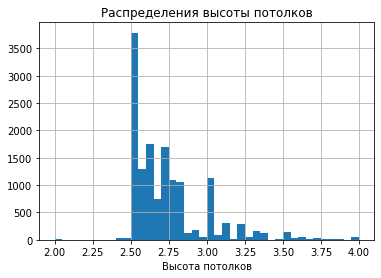

In [224]:
real_estate_data['ceiling_height'].hist(bins=40, range=(2,4))
plt.title('Распределения высоты потолков')
plt.xlabel('Высота потолков')

In [225]:
real_estate_data['ceiling_height'].describe()

count    14504.000000
mean         2.732251
std          0.387344
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         22.600000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'Высота потолков')

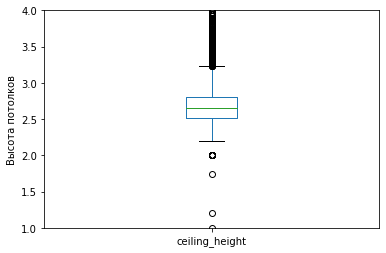

In [226]:
real_estate_data['ceiling_height'].plot(kind='box',ylim=(1,4))
plt.ylabel('Высота потолков')

Из гистограмма высоты потолков можно увидить выбросы с высотой меньше 2 метров. Это скорее всего опечатки в данных.
Также есть выбросы с высотой выше 3.4м. Высота потолков до 5-6 метров может быть в таунхаузах, лофт постройках или постройках класса "люкс". Выше этих значений скорее всего опечатки в данных.
Можно сказать, что распеределение высоты потолков имеет 3 региона: 
- 2.5-2.6 (скорее всего соответствуют квартирам в "хрущевках" и "брежневках")
- 2.7-2.8 (стандартные новостройки)
- 3.0-3.2 (квартиры в "сталинках")

Медианное значение высоты потолков равно 2.65 $м$. Половина всех значений общей площади укладывается между значениями 2.51 и 2.8 м.

**Время продажи квартиры `days_exposition`**

Text(0.5, 1.0, 'Количесво дней до снятия объявления')

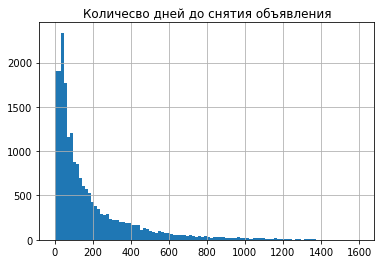

In [227]:
real_estate_data['days_exposition'].hist(bins=100,range=(0,1600))
plt.title('Количесво дней до снятия объявления')

In [228]:
print('Среднее значение времени продажи:',real_estate_data['days_exposition'].mean().round())
print('Медианное значение времени продажи:',real_estate_data['days_exposition'].median())

Среднее значение времени продажи: 181.0
Медианное значение времени продажи: 95.0


Text(0, 0.5, 'Количесво дней до снятия объявления')

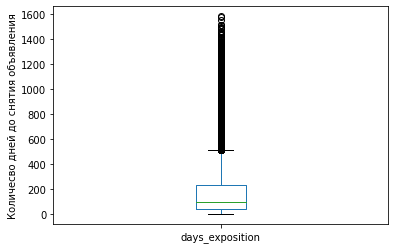

In [229]:
real_estate_data['days_exposition'].plot(kind='box')
plt.ylabel('Количесво дней до снятия объявления')

Половина квартир продается за срок три месяца. Есть квартиры, которые продаются несколько лет скорее всего это либо большие и дорогие квартиры, либо неснятое объявление. Можно считать, что если квартира продается дольше 500 дней, то она продается долго. 

Интересно отметить, что также есть квартиры, которые продаются очень быстро - в течении нескольких. В целом, для квартир проданных за 1.5 месяца (45 дней) и быстрее, можно считать, что продажи прошли быстро.

In [230]:
real_estate_data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Уберем редкие редкие и выбивающиеся значения.

In [231]:
# выбивающиеся
real_estate_data_freq = real_estate_data.query('days_exposition < 600')

In [232]:
# редкие
flat_sell_freq = real_estate_data_freq.pivot_table(index='days_exposition', 
                                                   values='last_price', 
                                                   aggfunc='count')
flat_sell_freq.columns = ['count']

flat_sell_freq = flat_sell_freq.query('count > 5')

In [233]:
# уберем значения, которые встречаются 5 и менее раза
real_estate_data_freq = real_estate_data_freq.query('days_exposition in @flat_sell_freq.index')

Text(0.5, 1.0, 'Количесво дней до снятия объявления')

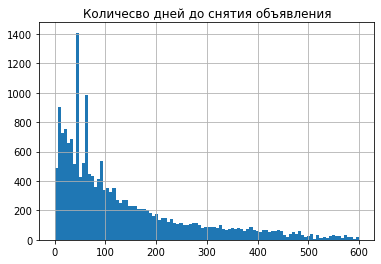

In [234]:
real_estate_data_freq['days_exposition'].hist(bins=100,range=(0,600))
plt.title('Количесво дней до снятия объявления')

**Какие фактроры влияют на стоимость квартиры**

In [235]:
price_correlation = real_estate_data[['price_per_square_meter','rooms','total_area','cityCenters_nearest',
                                      'floor_group','weekday_exposition','month_exposition','year_exposition']]
price_correlation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price_per_square_meter  23699 non-null  float64
 1   rooms                   23699 non-null  int64  
 2   total_area              23699 non-null  float64
 3   cityCenters_nearest     18180 non-null  float64
 4   floor_group             23699 non-null  object 
 5   weekday_exposition      23699 non-null  int64  
 6   month_exposition        23699 non-null  int64  
 7   year_exposition         23699 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.4+ MB


In [236]:
price_correlation.corr()

,price_per_square_meter,rooms,total_area,cityCenters_nearest,weekday_exposition,month_exposition,year_exposition
price_per_square_meter,1.000000,0.055420,0.301960,-0.317951,0.012490,-0.001995,0.008516
rooms,0.055420,1.000000,0.758344,-0.184864,0.004287,-0.004469,-0.055418
total_area,0.301960,0.758344,1.000000,-0.231446,0.004546,0.004920,-0.079912
cityCenters_nearest,-0.317951,-0.184864,-0.231446,1.000000,0.004064,-0.008978,0.032333
weekday_exposition,0.012490,0.004287,0.004546,0.004064,1.000000,-0.018980,-0.027444
month_exposition,-0.001995,-0.004469,0.004920,-0.008978,-0.018980,1.000000,-0.269642
year_exposition,0.008516,-0.055418,-0.079912,0.032333,-0.027444,-0.269642,1.000000


Из таблицы видно, что наибольшее влияние на цену за квадратный метр оказывают общая площадь и удаленность от центра.  Остальные параметры не влияют на цену за квадратный метр.

Рассмотрим перечисленные параметры подробнее.

Text(0.5, 1.0, 'Зависимоть цены за кв.м от общей площади')

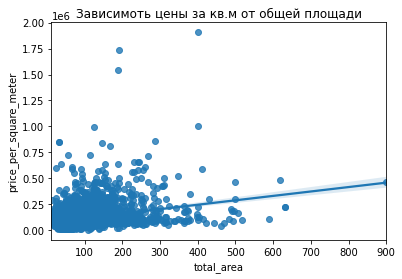

In [237]:
# Зависимоть цены за кв.м от общей площади
sns.regplot(data=price_correlation,
            x=price_correlation['total_area'],
            y=price_correlation['price_per_square_meter'])
plt.title('Зависимоть цены за кв.м от общей площади')

<AxesSubplot:title={'center':'Зависимоть цены за кв.м от удаленности от центра города'}, xlabel='cityCenters_nearest', ylabel='price_per_square_meter'>

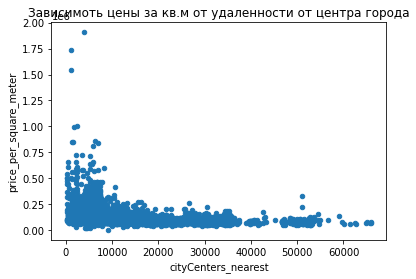

In [238]:
price_correlation.plot(kind='scatter',
                       x='cityCenters_nearest',
                       y='price_per_square_meter',
                       title='Зависимоть цены за кв.м от удаленности от центра города'
                      )

На графике видна ступенька для значения около 8000м от центра города. Это наблюдение будет проверено в пункте ниже.

**10 населённых пунктов с наибольшим числом объявлений**

In [239]:
# 10 населённых пунктов с наибольшим числом объявлений
popular_10 = real_estate_data.pivot_table(index='locality_name',
                                          values='price_per_square_meter',
                                          aggfunc=['count','mean'])
popular_10.columns = ['count','mean_price_per_square_meter']
popular_10 = popular_10.sort_values(by='count',ascending=False)
popular_10 = popular_10[:10]
popular_10['mean_price_per_square_meter'] = popular_10['mean_price_per_square_meter'].round()
popular_10

,count,mean_price_per_square_meter
locality_name,,
Санкт-Петербург,15721,114849.0
Мурино,590,86088.0
Кудрово,472,95325.0
Шушары,440,78677.0
Всеволожск,398,68654.0
Пушкин,369,103126.0
Колпино,338,75425.0
Парголово,327,90176.0
Гатчина,307,68746.0


Самое дорогое жилье в Санкт-Петербурге:

In [240]:
popular_10[popular_10['mean_price_per_square_meter'] == popular_10['mean_price_per_square_meter'].max()]

,count,mean_price_per_square_meter
locality_name,,
Санкт-Петербург,15721,114849.0


Самое дешёвое жилье в Выборге:

In [241]:
popular_10[popular_10['mean_price_per_square_meter'] == popular_10['mean_price_per_square_meter'].min()]

,count,mean_price_per_square_meter
locality_name,,
Выборг,237,58142.0


**Стоимость в зависимости от удаленности от центра в Санкт-Петербурге**

In [242]:
spb_flats = real_estate_data[real_estate_data['locality_name'] == 'Санкт-Петербург']
spb_flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_group,living_to_total_area,kitchen_to_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,755.0,NaN,120370.370370,7,3,2019,Другой,0.472222,0.231481
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2,574.0,558.0,92785.714286,20,8,2015,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3,234.0,424.0,408176.100629,24,7,2015,Другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,48.0,121.0,100000.000000,19,6,2018,Другой,0.320000,0.410000
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,False,...,0,NaN,NaN,110544.692737,18,4,2019,Другой,NaN,0.263966


In [243]:
spb_flats['center_distance'] = (spb_flats['cityCenters_nearest']/1000).round()
#spb_flats['center_distance'] = spb_flats['cityCenters_nearest'].round()

/tmp/ipykernel_36/573521678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_flats['center_distance'] = (spb_flats['cityCenters_nearest']/1000).round()


<AxesSubplot:title={'center':'Стоимость жилья в Санкт-Петербурге в зависимости от удаленности от центра'}, xlabel='center_distance'>

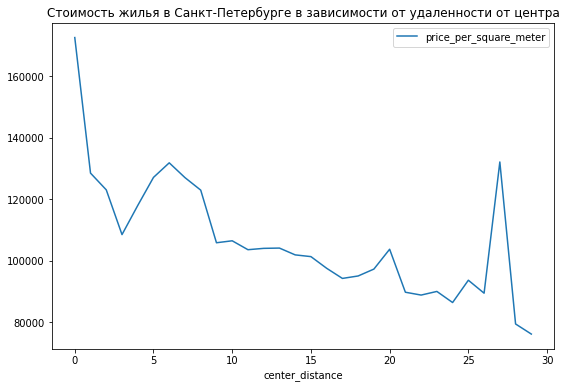

In [244]:
spb_distance_pivot = spb_flats.pivot_table(index='center_distance',
                      values='price_per_square_meter',
                      aggfunc='median'
                     )
spb_distance_pivot.plot(title='Стоимость жилья в Санкт-Петербурге в зависимости от удаленности от центра',
                        figsize=(9,6))

График зависимотси цен на жилье от удаленности от центра имеет несколько пиков.
Пики на 20 и 27 километрах возможно соответсвуют каким-либо местным структурам.

Первое падение цены происходит на 3 километрах, скорее всего это связанно с тем, что на таком расстоянии еще можно ходить до центра пешком или достаточно быстро добираться на наземном транспорте. Эту зону можно условно назвать "пешеходной центральной зоной".

Второе падение цены происходит на 9 километрах. В этом радиусе поездки на общественном транспорте в центр еще не занимают слишком много времени. После 9ого километра цена постепенно падает.

Можно сказать, что центральная зона имеет радиус 9 километров.

**Квартиры в центре**
выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»

In [245]:
price_correlation_center = spb_flats[spb_flats['center_distance'] <= 9 ][['price_per_square_meter','rooms','total_area','cityCenters_nearest',
                                      'floor_group','weekday_exposition','month_exposition','year_exposition']]
price_correlation_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4715 entries, 3 to 23694
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price_per_square_meter  4715 non-null   float64
 1   rooms                   4715 non-null   int64  
 2   total_area              4715 non-null   float64
 3   cityCenters_nearest     4715 non-null   float64
 4   floor_group             4715 non-null   object 
 5   weekday_exposition      4715 non-null   int64  
 6   month_exposition        4715 non-null   int64  
 7   year_exposition         4715 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 331.5+ KB


In [246]:
price_correlation_center.corr()

,price_per_square_meter,rooms,total_area,cityCenters_nearest,weekday_exposition,month_exposition,year_exposition
price_per_square_meter,1.000000,0.031112,0.268930,-0.117536,0.032822,-0.008116,-0.000847
rooms,0.031112,1.000000,0.750790,-0.256693,0.005700,-0.003403,-0.074348
total_area,0.268930,0.750790,1.000000,-0.215909,0.020831,0.003980,-0.092314
cityCenters_nearest,-0.117536,-0.256693,-0.215909,1.000000,-0.021946,-0.012370,0.077346
weekday_exposition,0.032822,0.005700,0.020831,-0.021946,1.000000,-0.011009,-0.040937
month_exposition,-0.008116,-0.003403,0.003980,-0.012370,-0.011009,1.000000,-0.250688
year_exposition,-0.000847,-0.074348,-0.092314,0.077346,-0.040937,-0.250688,1.000000


Из таблицы видно, что наибольшее влияние на цену за квадратный метр оказывают общая площадь  и удаленность от центра.
При этом удаленность от центра играет меньшую роль для квартир центре в сравнении с полными данными.
Остальные параметры не влияют на цену за квадратный метр как для квартир в центре, так и для остальных квартир.

Text(0.5, 1.0, 'Зависимоть цены за кв.м от общей площади\n для центра города')

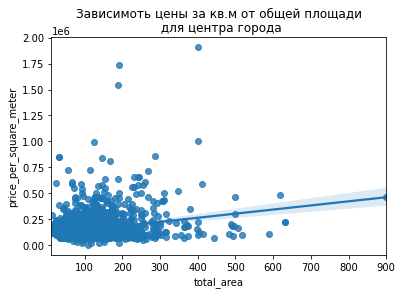

In [257]:
# Зависимоть цены за кв.м от общей площади
sns.regplot(data=price_correlation_center,
            x=price_correlation_center['total_area'],
            y=price_correlation_center['price_per_square_meter'])
plt.title('Зависимоть цены за кв.м от общей площади\n для центра города')

<AxesSubplot:title={'center':'Зависимоть цены за кв.м от удаленности от \n центра города для центра города'}, xlabel='cityCenters_nearest', ylabel='price_per_square_meter'>

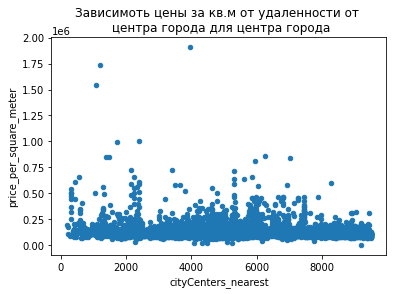

In [258]:
price_correlation_center.plot(kind='scatter',
                       x='cityCenters_nearest',
                       y='price_per_square_meter',
                       title='Зависимоть цены за кв.м от удаленности от \n центра города для центра города'
                      )

## Общий вывод

В этом проекте были проанализированны о продаже квартир из Яндекс недвижимости.

На этапе предобработки данных были частично заполнены пропуски в данных, также были исправлены названия населенных пунктов - приведены к одному написанию, чтобы избежать  дубликатов.

Дополнительно, в таблицу были добавлены следующая информация:
- цена квадратного метра
- день недели, месяц и год публикации объявления
- этаж квартиры; варианты — первый, последний, другой, неопределен
- посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей

Анализ данных показал следующее:
* Цена за квадратный метр прямо коррелирует с общей площадью и обратно коррелирует с удаленностью от центра. Остальные параметры существенно не влияют на цену. При этом данные зависимости сохраняются как для всего объема квартир, так и только для тех, которые входят в центральную зону Санкт-Петербурга.
* Радиус центральной зоны в Санкт-Петербурге составляет 9 км.Также можно выделить условно "пешеходную" центральную зону радиусом 3 км.

